In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [41]:
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'iframe'

In [2]:
distritos_sp = pd.read_csv('distritos_sp.csv') 

In [3]:
distritos_sp.head()

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994


In [4]:
distritos_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


In [5]:
variaveis_numericas = distritos_sp.drop(['cod_ibge', 'distritos'], axis=1)

In [7]:
variaveis_numericas.corr()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


Text(0.5, 1.0, 'Matriz de Correlações')

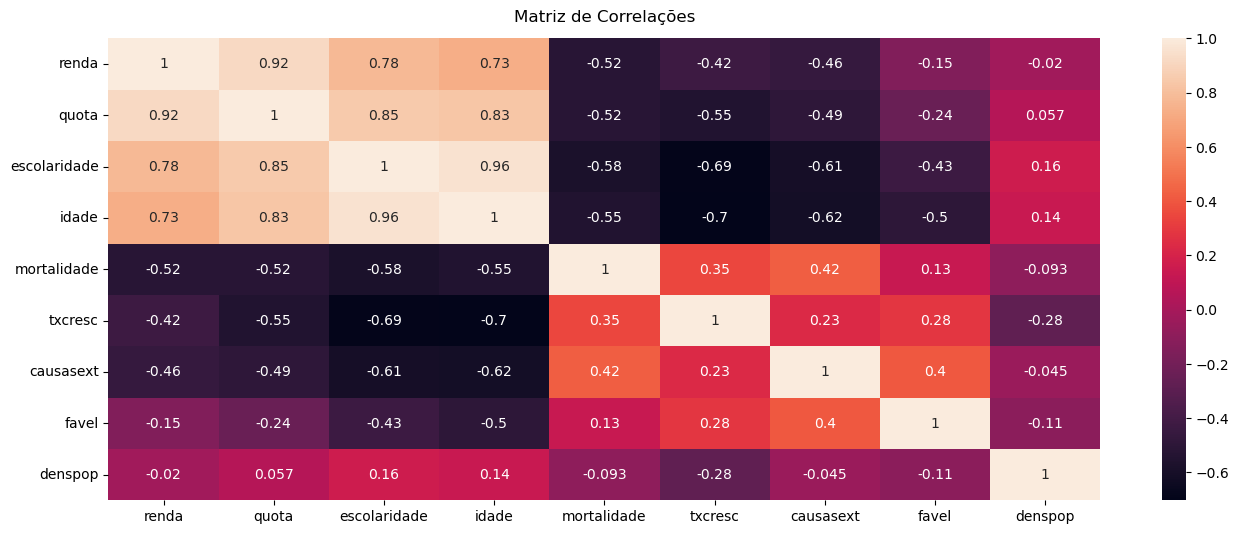

In [15]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(variaveis_numericas.corr(),annot=True)
heatmap.set_title("Matriz de Correlações", fontdict={'fontsize': 12}, pad=12)

In [16]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 283.3 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=52fe5dece220e1e92fd22d2c749b3706b7a3197537a5545bf4caf8f36e912efd
  Stored in directory: /home/jovyan/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [19]:
kmo_variaveis, kmo = calculate_kmo(variaveis_numericas)

In [20]:
kmo_variaveis

array([0.77821831, 0.81941916, 0.8560973 , 0.81750459, 0.94677797,
       0.84146713, 0.89083164, 0.78871213, 0.63275248])

In [21]:
kmo

0.833091424182929

### Realizando o teste de esfericidade de Bartlett


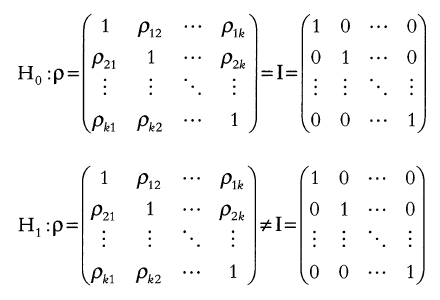

In [22]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [24]:
qui_quadrado, pvalor =  calculate_bartlett_sphericity(variaveis_numericas)

In [26]:
print(pvalor)

5.607017481838534e-134


In [25]:
pvalor < 0.05

True

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
colunas_numericas = variaveis_numericas.columns 
colunas_numericas 

Index(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade', 'txcresc',
       'causasext', 'favel', 'denspop'],
      dtype='object')

In [30]:
padronizar = StandardScaler()
variaveis_numericas =  padronizar.fit_transform(variaveis_numericas)

In [31]:
variaveis_numericas

array([[ 1.08502328e-01,  1.80715140e-01,  5.23096244e-01,
         1.05541274e+00, -4.29281808e-01, -5.38805723e-01,
        -7.80681293e-01, -7.56406323e-01,  5.21804668e-01],
       [ 2.40630528e+00,  1.98438577e+00,  1.32019516e+00,
         1.28464265e+00, -1.47188596e+00, -7.33574170e-01,
        -1.40197826e+00, -6.68425227e-01, -8.57183702e-01],
       [-7.90322801e-01, -1.13342509e+00, -1.27037668e+00,
        -1.00765651e+00, -1.27369371e-01,  5.17822174e+00,
        -2.08708641e+00, -7.56406323e-01, -1.84993379e+00],
       [-5.64581006e-01, -4.12654904e-01, -2.74002674e-01,
        -9.07368417e-02,  4.90544879e-01, -3.18259087e-01,
         2.21327218e-01, -7.04087705e-02,  7.83822446e-01],
       [-6.29818314e-01, -6.35605024e-01, -7.47280632e-02,
        -9.07368417e-02,  7.52202169e-01, -4.12779054e-01,
        -1.65420498e-01, -2.32344990e-01,  1.36865133e+00],
       [ 5.20636431e-01,  1.67189899e-01,  9.21645940e-01,
         8.26182822e-01, -1.48396254e+00, -6.247330

In [33]:
dados_padronizados = pd.DataFrame(variaveis_numericas, columns=colunas_numericas)
dados_padronizados

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651
...,...,...,...,...,...,...,...,...,...
91,-0.467243,-0.467629,-0.274003,-0.090737,-0.113280,-0.415643,0.297211,-0.438909,1.804943
92,-0.104813,0.069895,0.124547,0.596953,-0.328644,-0.742167,-0.197326,0.190984,0.032016
93,1.153335,0.476964,0.323822,-0.090737,0.154416,-0.269567,0.154929,1.147301,-0.400020
94,0.197556,-0.304016,-0.274003,-0.319967,-0.340721,0.191576,-0.376687,0.333794,-0.545923


In [35]:
from sklearn.decomposition import PCA

In [36]:
n_fatores = dados_padronizados.shape[1]
n_fatores

9

In [37]:
pca = PCA(n_components= n_fatores)
pca.fit(dados_padronizados)

PCA(n_components=9)

In [38]:
pca.explained_variance_ratio_

array([0.55067008, 0.1293709 , 0.11070601, 0.08045185, 0.05881136,
       0.04425824, 0.01440763, 0.00722961, 0.00409432])

In [39]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 6.7 MB/s eta 0:00:0000:0100:01


In [43]:
fatores = [f'F{i+1}' for i in range(n_fatores) ]
fatores

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']

In [46]:
fig = px.bar(x=fatores, y=pca.explained_variance_ratio_, text=np.around(pca.explained_variance_ratio_, decimals=2),
            title= "Scree Plot")
fig.update_layout(yaxis={'title': 'Procentagem de variância explicada','tickfont':{'size':15}},
                 xaxis={'title': 'Fatores','tickfont':{'size':15}},
                 title={'font':{'size': 25}})
fig.show()

In [48]:
varianca_acumulada = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_fatores)]
varianca_acumulada


[0.5506700772160417,
 0.6800409820794437,
 0.7907469955852218,
 0.8711988432249139,
 0.930010202543966,
 0.9742684414070404,
 0.9886760753033328,
 0.9959056848263386,
 1.0]

In [50]:
fig = px.bar(x=fatores, y=varianca_acumulada, text=np.around(varianca_acumulada, decimals=2),
            title= "Scree Plot")
fig.update_layout(yaxis={'title': 'Procentagem de variância explicada','tickfont':{'size':15}},
                 xaxis={'title': 'Fatores','tickfont':{'size':15}},
                 title={'font':{'size': 25}})
fig.show()

In [52]:
pca.explained_variance_

array([5.00819944, 1.17659433, 1.00684206, 0.73168838, 0.53487384,
       0.40251704, 0.13103364, 0.0657514 , 0.03723672])

In [55]:
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_ * n_fatores))

9.094736842105265
9.0


In [56]:
autovalores = pca.explained_variance_ratio_ * n_fatores

In [57]:
autovalores

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

In [59]:
fatores_selecionados = ['FAtor selecionado' if autovalor > 1 else 'FAtor não selecionado' for autovalor in autovalores]
fatores_selecionados

['FAtor selecionado',
 'FAtor selecionado',
 'FAtor não selecionado',
 'FAtor não selecionado',
 'FAtor não selecionado',
 'FAtor não selecionado',
 'FAtor não selecionado',
 'FAtor não selecionado',
 'FAtor não selecionado']

In [60]:
fig = px.bar(x = range(1,10), y = autovalores, text = np.around(autovalores, decimals = 2),
             title = 'Scree Plot', color = fatores_selecionados)
fig.update_layout(yaxis = {'title': 'Quantidade de variáveis explicadas', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Autovalor', 'tickfont': {'size': 15}},
                  title = {'font':{'size':25}})
fig.show()

In [63]:
resumo = pd.DataFrame({'Fator': fatores, 'Autovalor': autovalores, 'Variância explicada': pca.explained_variance_ratio_, 'Variância acumulada': varianca_acumulada})
resumo

,Fator,Autovalor,Variância explicada,Variância acumulada
0,F1,4.956031,0.550670,0.550670
1,F2,1.164338,0.129371,0.680041
2,F3,0.996354,0.110706,0.790747
3,F4,0.724067,0.080452,0.871199
4,F5,0.529302,0.058811,0.930010
5,F6,0.398324,0.044258,0.974268
6,F7,0.129669,0.014408,0.988676
7,F8,0.065066,0.007230,0.995906
8,F9,0.036849,0.004094,1.000000


In [64]:
pd.DataFrame(pca.components_, columns = colunas_numericas, index = [f'Autovetor {i+1}' for i in range(n_fatores)])

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
Autovetor 1,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
Autovetor 2,0.341942,0.209864,-0.022792,-0.060653,-0.163695,0.312726,-0.040693,0.410400,-0.734953
Autovetor 3,-0.172958,-0.155014,-0.009357,0.063483,0.173795,0.277756,-0.439119,-0.688140,-0.410151
Autovetor 4,-0.063391,-0.139963,-0.084585,-0.126908,-0.580196,0.453115,-0.490352,0.158792,0.381486
Autovetor 5,0.342004,0.277961,0.003884,-0.031407,0.681132,0.350104,-0.289687,0.146396,0.336014
Autovetor 6,0.307190,0.212669,-0.051763,-0.065073,-0.214495,0.467020,0.586419,-0.467725,0.163471
Autovetor 7,0.357319,0.147798,-0.531450,-0.535113,-0.088293,-0.423005,-0.216760,-0.219039,-0.001545
Autovetor 8,-0.564954,0.740900,-0.332142,0.128794,-0.043236,0.046332,-0.022126,0.019462,-0.010178
Autovetor 9,-0.226373,0.235400,0.638974,-0.694279,0.002605,-0.004163,-0.011863,-0.045723,-0.027849


In [65]:
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores


array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

In [66]:
pca.components_.T

array([[ 0.37378561,  0.34194215, -0.17295765, -0.06339126,  0.34200389,
         0.30718994,  0.35731885, -0.56495425, -0.2263729 ],
       [ 0.40454585,  0.20986443, -0.15501444, -0.13996332,  0.27796072,
         0.21266882,  0.14779821,  0.74089992,  0.23540004],
       [ 0.43416448, -0.02279207, -0.00935731, -0.08458471,  0.00388393,
        -0.051763  , -0.5314497 , -0.33214191,  0.63897423],
       [ 0.431286  , -0.06065282,  0.06348322, -0.12690816, -0.03140668,
        -0.06507346, -0.53511308,  0.12879361, -0.69427882],
       [-0.29453553, -0.16369471,  0.17379496, -0.58019562,  0.68113225,
        -0.21449531, -0.08829316, -0.04323611,  0.00260451],
       [-0.31298937,  0.31272645,  0.27775581,  0.45311541,  0.35010444,
         0.46702002, -0.42300489,  0.04633227, -0.00416312],
       [-0.29942197, -0.04069338, -0.43911857, -0.49035151, -0.28968662,
         0.58641913, -0.21675972, -0.02212608, -0.01186317],
       [-0.20536447,  0.41039975, -0.68814007,  0.1587924 ,  0

In [67]:
cargas_fatorias = pd.DataFrame(pca.components_.T * raiz_autovalores, columns=fatores, index=colunas_numericas)
cargas_fatorias

,F1,F2,F3,F4,F5,F6,F7,F8,F9
renda,0.832127,0.368971,-0.172642,-0.053941,0.248819,0.193877,0.128669,-0.144109,-0.043455
quota,0.900606,0.226453,-0.154732,-0.119098,0.202225,0.134222,0.053221,0.188990,0.045188
escolaridade,0.966543,-0.024594,-0.009340,-0.071975,0.002826,-0.032669,-0.191373,-0.084723,0.122658
idade,0.960135,-0.065447,0.063367,-0.107989,-0.022849,-0.041070,-0.192692,0.032853,-0.133274
mortalidade,-0.655699,-0.176634,0.173478,-0.493701,0.495545,-0.135374,-0.031794,-0.011029,0.000500
txcresc,-0.696781,0.337446,0.277249,0.385565,0.254712,0.294750,-0.152322,0.011818,-0.000799
causasext,-0.666578,-0.043910,-0.438317,-0.417250,-0.210756,0.370106,-0.078054,-0.005644,-0.002277
favel,-0.457185,0.442840,-0.686884,0.135120,0.106508,-0.295195,-0.078875,0.004964,-0.008777
denspop,0.166281,-0.793048,-0.409402,0.324614,0.244461,0.103171,-0.000556,-0.002596,-0.005346


In [68]:
resumo_cargas_fatorias = cargas_fatorias[['F1','F2']].copy()
resumo_cargas_fatorias

,F1,F2
renda,0.832127,0.368971
quota,0.900606,0.226453
escolaridade,0.966543,-0.024594
idade,0.960135,-0.065447
mortalidade,-0.655699,-0.176634
txcresc,-0.696781,0.337446
causasext,-0.666578,-0.043910
favel,-0.457185,0.442840
denspop,0.166281,-0.793048


In [70]:
fig = px.scatter(cargas_fatorias,x = 'F1', y='F2', text=cargas_fatorias.index )
fig.update_traces(textposition='top center')
fig.show()

In [71]:
resumo_cargas_fatorias['Comunalidade'] = (resumo_cargas_fatorias ** 2).sum(axis = 1)
resumo_cargas_fatorias

,F1,F2,Comunalidade
renda,0.832127,0.368971,0.828575
quota,0.900606,0.226453,0.862372
escolaridade,0.966543,-0.024594,0.934811
idade,0.960135,-0.065447,0.926143
mortalidade,-0.655699,-0.176634,0.461141
txcresc,-0.696781,0.337446,0.599374
causasext,-0.666578,-0.043910,0.446254
favel,-0.457185,0.442840,0.405126
denspop,0.166281,-0.793048,0.656574


Fórmula dos fatores

\begin{align}
\mathbf{F_{1}} = s_{11} * Zx + ... + s_{1n} * Zw
\end{align}
\begin{align}
...
\end{align}
\begin{align}
\mathbf{F_{n}} = s_{n1} * Zx + ... + s_{nn} * Zw
\end{align}

In [73]:
pca.components_[0]

array([ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
       -0.31298937, -0.29942197, -0.20536447,  0.0746924 ])

In [78]:
pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578],
       [ 0.34200389,  0.27796072,  0.00388393, -0.03140668,  0.68113225,
         0.35010444, -0.28968662,  0.14639622,  0.33601377],
       [ 0.30718994,  0.21266882, -0.051763  , -0.06507346, -0.21449531,
         0.46702002,  0.58641913, -0.46772469,  0.16347059],
       [ 0.35731885,  0.14779821, -0.5314497 , -0.53511308, -0.08829316,
        -0.42300489, -0.21675972, -0.21903914, -0.00154526],
       [-0.56495425,  0.74089992, -0.33214191,  0.12879361, -0

Exemplo: `pca.components_[0]` corresponde ao primeiro autovetor. 

Para conseguir os scores fatoriais do primeiro fator, é necessário tomar `pca.components_[0]/np.sqrt(pca.explained_variance_ratio_*9)[0]`

In [80]:
scores_fatoriais = np.zeros(pca.components_.shape)
for i in range (len(pca.components_)):
    scores_fatoriais[i] = pca.components_[i] / raiz_autovalores[i]
scores_fatoriais

array([[ 0.16790189,  0.18171917,  0.19502366,  0.19373066, -0.13230331,
        -0.14059264, -0.13449826, -0.09224829,  0.0335513 ],
       [ 0.31689332,  0.19449089, -0.02112244, -0.05620973, -0.15170332,
         0.2898178 , -0.0377124 ,  0.38033608, -0.68111471],
       [-0.1732738 , -0.1552978 , -0.00937442,  0.06359926,  0.17411264,
         0.27826353, -0.43992125, -0.68939795, -0.4109005 ],
       [-0.07449723, -0.16448449, -0.09940371, -0.14914211, -0.68184425,
         0.53249994, -0.5762597 ,  0.18661238,  0.448321  ],
       [ 0.47008802,  0.38205999,  0.00533851, -0.04316882,  0.93622359,
         0.48122231, -0.39817738,  0.20122318,  0.46185453],
       [ 0.48673063,  0.33696555, -0.08201647, -0.10310639, -0.33985956,
         0.73997522,  0.92915851, -0.74109174,  0.25901285],
       [ 0.99228938,  0.4104418 , -1.47585803, -1.48603139, -0.2451938 ,
        -1.17470224, -0.6019508 , -0.60828084, -0.00429124],
       [-2.21480047,  2.90456349, -1.30210199,  0.50491194, -0

In [81]:
dados_padronizados

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651
...,...,...,...,...,...,...,...,...,...
91,-0.467243,-0.467629,-0.274003,-0.090737,-0.113280,-0.415643,0.297211,-0.438909,1.804943
92,-0.104813,0.069895,0.124547,0.596953,-0.328644,-0.742167,-0.197326,0.190984,0.032016
93,1.153335,0.476964,0.323822,-0.090737,0.154416,-0.269567,0.154929,1.147301,-0.400020
94,0.197556,-0.304016,-0.274003,-0.319967,-0.340721,0.191576,-0.376687,0.333794,-0.545923


In [84]:
pca.feature_names_in_

array(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade',
       'txcresc', 'causasext', 'favel', 'denspop'], dtype=object)

In [85]:
F1 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F1 += scores_fatoriais[0][indice] * dados_padronizados[variavel]


In [86]:
F2 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F2 += scores_fatoriais[1][indice] * dados_padronizados[variavel]

In [89]:
dados_fatorias = distritos_sp[['cod_ibge', 'distritos']].copy()
dados_fatorias['F1'] = F1
dados_fatorias['F2'] = F2
dados_fatorias

,cod_ibge,distritos,F1,F2
0,1,Água Rasa,0.682371,-0.705531
1,12,Alto de Pinheiros,1.790304,1.441565
2,23,Anhanguera,-1.204379,2.183685
3,34,Aricanduva,-0.257928,-0.983935
4,45,Artur Alvim,-0.205284,-1.564607
...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.738918
92,93,Vila Prudente,0.292861,-0.162769
93,94,Vila Sônia,0.203269,1.057936
94,95,São Domingos,-0.117800,0.647456


In [92]:
fig = px.scatter(cargas_fatorias, x = 'F1', y = 'F2', text = cargas_fatorias.index)
fig.update_traces(textposition = 'top center')
fig.show()

In [93]:
 pca.explained_variance_ratio_[0]

0.5506700772160417

In [94]:
dados_fatorias['Rankings'] = dados_fatorias['F1'] *  pca.explained_variance_ratio_[0] + dados_fatorias['F2'] *  pca.explained_variance_ratio_[1]
dados_fatorias

,cod_ibge,distritos,F1,F2,Rankings
0,1,Água Rasa,0.682371,-0.705531,0.284486
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363
2,23,Anhanguera,-1.204379,2.183685,-0.380710
3,34,Aricanduva,-0.257928,-0.983935,-0.269326
4,45,Artur Alvim,-0.205284,-1.564607,-0.315459
...,...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,0.292861,-0.162769,0.140212
93,94,Vila Sônia,0.203269,1.057936,0.248800
94,95,São Domingos,-0.117800,0.647456,0.018893


In [96]:
dados_fatorias.sort_values('Rankings', ascending = False)

,cod_ibge,distritos,F1,F2,Rankings
44,40,Jardim Paulista,2.466536,0.493433,1.422083
31,26,Moema,1.968233,1.369083,1.260966
70,69,Santo Amaro,1.897554,1.459515,1.233745
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363
53,50,Morumbi,1.166425,3.021258,1.033178
...,...,...,...,...,...
42,38,Jardim Ângela,-1.684687,0.777432,-0.827130
95,96,Lajeado,-1.289226,-0.995189,-0.838686
10,3,Brasilândia,-1.531760,-0.046604,-0.849523
24,18,Cidade Tiradentes,-1.690649,-0.235010,-0.961393


In [98]:
distritos_sp['Rankings'] = dados_fatorias['Rankings'] 
distritos_sp['F1'] = F1
distritos_sp['F2'] = F2
distritos_sp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,Rankings,F1,F2
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.284486,0.682371,-0.705531
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.172363,1.790304,1.441565
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-0.380710,-1.204379,2.183685
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.269326,-0.257928,-0.983935
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.315459,-0.205284,-1.564607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,-0.280003,-0.099947,-1.738918
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.140212,0.292861,-0.162769
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,0.248800,0.203269,1.057936
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,0.018893,-0.117800,0.647456


In [99]:
conda install -c conda-forge geopandas

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.3.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    azure-core-cpp-1.11.1      |       h91d86a7_1         335 KB  conda-forge
    azure-identity-cpp-1.6.0   |       hf1915f5_1         187 KB  conda-forge
    azure-storage-blobs-cpp-12.10.0|       h00ab1b0_1         505 KB  conda-forge
    azure-storage-common-cpp-12.5.0|       h94269e2_4         129 KB  conda-forge
    branca-0.7.2               |     pyhd8ed1ab_0          28 KB  conda-forge
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB  conda-forge
    cairo-1.18.0    

In [100]:
import geopandas as gpd

In [115]:
dados_mapa = gpd.read_file('SIRGAS_SHP_distrito/SIRGAS_SHP_distrito.shp')

In [116]:
dados_mapa

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,1.324786e+07,13.248,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,MARSILAC,52,20,PARELHEIROS,MAR,2.081957e+08,208.196,"POLYGON ((336124.090 7355302.282, 336121.755 7..."
2,MOEMA,32,12,VILA MARIANA,MOE,9.079516e+06,9.080,"POLYGON ((331242.174 7392162.324, 331244.581 7..."
3,ARTUR ALVIM,5,21,PENHA,AAL,6.508361e+06,6.508,"POLYGON ((349416.226 7397718.808, 349416.884 7..."
4,IGUATEMI,33,30,SAO MATEUS,IGU,1.958356e+07,19.584,"POLYGON ((350859.949 7389599.855, 350880.182 7..."
...,...,...,...,...,...,...,...,...
91,CAMPO LIMPO,17,17,CAMPO LIMPO,CLM,1.259634e+07,12.596,"POLYGON ((321265.375 7388006.570, 321292.309 7..."
92,JAGUARE,41,08,LAPA,JRE,6.579876e+06,6.580,"POLYGON ((322952.516 7394978.618, 323250.620 7..."
93,JARAGUA,42,02,PIRITUBA-JARAGUA,JAR,2.833031e+07,28.330,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
94,JARDIM HELENA,44,23,SAO MIGUEL,JDH,9.148559e+06,9.149,"POLYGON ((352915.621 7402621.049, 352944.248 7..."


In [117]:
dados_mapa.set_crs(epsg = 31983, inplace = True)

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,1.324786e+07,13.248,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,MARSILAC,52,20,PARELHEIROS,MAR,2.081957e+08,208.196,"POLYGON ((336124.090 7355302.282, 336121.755 7..."
2,MOEMA,32,12,VILA MARIANA,MOE,9.079516e+06,9.080,"POLYGON ((331242.174 7392162.324, 331244.581 7..."
3,ARTUR ALVIM,5,21,PENHA,AAL,6.508361e+06,6.508,"POLYGON ((349416.226 7397718.808, 349416.884 7..."
4,IGUATEMI,33,30,SAO MATEUS,IGU,1.958356e+07,19.584,"POLYGON ((350859.949 7389599.855, 350880.182 7..."
...,...,...,...,...,...,...,...,...
91,CAMPO LIMPO,17,17,CAMPO LIMPO,CLM,1.259634e+07,12.596,"POLYGON ((321265.375 7388006.570, 321292.309 7..."
92,JAGUARE,41,08,LAPA,JRE,6.579876e+06,6.580,"POLYGON ((322952.516 7394978.618, 323250.620 7..."
93,JARAGUA,42,02,PIRITUBA-JARAGUA,JAR,2.833031e+07,28.330,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
94,JARDIM HELENA,44,23,SAO MIGUEL,JDH,9.148559e+06,9.149,"POLYGON ((352915.621 7402621.049, 352944.248 7..."


In [107]:
dados_mapas

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,1.324786e+07,13.248,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,MARSILAC,52,20,PARELHEIROS,MAR,2.081957e+08,208.196,"POLYGON ((336124.090 7355302.282, 336121.755 7..."
2,MOEMA,32,12,VILA MARIANA,MOE,9.079516e+06,9.080,"POLYGON ((331242.174 7392162.324, 331244.581 7..."
3,ARTUR ALVIM,5,21,PENHA,AAL,6.508361e+06,6.508,"POLYGON ((349416.226 7397718.808, 349416.884 7..."
4,IGUATEMI,33,30,SAO MATEUS,IGU,1.958356e+07,19.584,"POLYGON ((350859.949 7389599.855, 350880.182 7..."
...,...,...,...,...,...,...,...,...
91,CAMPO LIMPO,17,17,CAMPO LIMPO,CLM,1.259634e+07,12.596,"POLYGON ((321265.375 7388006.570, 321292.309 7..."
92,JAGUARE,41,08,LAPA,JRE,6.579876e+06,6.580,"POLYGON ((322952.516 7394978.618, 323250.620 7..."
93,JARAGUA,42,02,PIRITUBA-JARAGUA,JAR,2.833031e+07,28.330,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
94,JARDIM HELENA,44,23,SAO MIGUEL,JDH,9.148559e+06,9.149,"POLYGON ((352915.621 7402621.049, 352944.248 7..."


<Axes: >

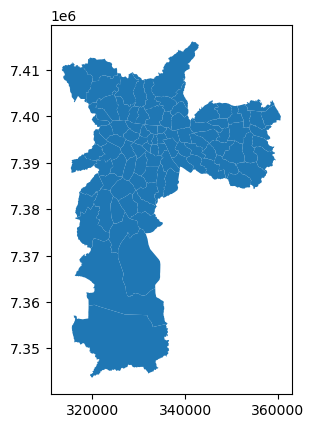

In [118]:
dados_mapa.plot()

In [119]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [120]:
from unidecode import unidecode

In [121]:
nomes_distritos = [unidecode(distrito).upper() for distrito in distritos_sp['distritos']]
nomes_distritos

['AGUA RASA',
 'ALTO DE PINHEIROS',
 'ANHANGUERA',
 'ARICANDUVA',
 'ARTUR ALVIM',
 'BARRA FUNDA',
 'BELA VISTA',
 'BELEM',
 'BOM RETIRO',
 'BRAS',
 'BRASILANDIA',
 'BUTANTA',
 'CACHOEIRINHA',
 'CAMBUCI',
 'CAMPO BELO',
 'CAMPO GRANDE',
 'CAMPO LIMPO',
 'CANGAIBA',
 'CAPAO REDONDO',
 'CARRAO',
 'CASA VERDE',
 'CIDADE ADEMAR',
 'CIDADE DUTRA',
 'CIDADE LIDER',
 'CIDADE TIRADENTES',
 'CONSOLACAO',
 'CURSINO',
 'ERMELINO MATARAZZO',
 'FREGUESIA DO O',
 'GRAJAU',
 'GUAIANASES',
 'MOEMA',
 'IGUATEMI',
 'IPIRANGA',
 'ITAIM BIBI',
 'ITAIM PAULISTA',
 'ITAQUERA',
 'JABAQUARA',
 'JACANA',
 'JAGUARA',
 'JAGUARE',
 'JARAGUA',
 'JARDIM ANGELA',
 'JARDIM HELENA',
 'JARDIM PAULISTA',
 'JARDIM SAO LUIS',
 'JOSE BONIFACIO',
 'LAPA',
 'LIBERDADE',
 'LIMAO',
 'MANDAQUI',
 'MARSILAC',
 'MOOCA',
 'MORUMBI',
 'PARELHEIROS',
 'PARI',
 'PARQUE DO CARMO',
 'PEDREIRA',
 'PENHA',
 'PERDIZES',
 'PERUS',
 'PINHEIROS',
 'PIRITUBA',
 'PONTE RASA',
 'RAPOSO TAVARES',
 'REPUBLICA',
 'RIO PEQUENO',
 'SARCOMA',
 'SANTA 

In [122]:
distritos_sp['nome_distrito'] = nomes_distritos

In [123]:
distritos_distintos = distritos_sp['nome_distrito'].values != dados_mapa['ds_nome'].values
distritos_distintos.sum()

96

In [124]:
distritos_sp[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,Rankings,F1,F2,nome_distrito
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.284486,0.682371,-0.705531,AGUA RASA
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.172363,1.790304,1.441565,ALTO DE PINHEIROS
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-0.380710,-1.204379,2.183685,ANHANGUERA
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.269326,-0.257928,-0.983935,ARICANDUVA
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.315459,-0.205284,-1.564607,ARTUR ALVIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,-0.280003,-0.099947,-1.738918,VILA MEDEIROS
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.140212,0.292861,-0.162769,VILA PRUDENTE
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,0.248800,0.203269,1.057936,VILA SONIA
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,0.018893,-0.117800,0.647456,SAO DOMINGOS


In [125]:
dados_mapa[distritos_distintos]

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,1.324786e+07,13.248,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,MARSILAC,52,20,PARELHEIROS,MAR,2.081957e+08,208.196,"POLYGON ((336124.090 7355302.282, 336121.755 7..."
2,MOEMA,32,12,VILA MARIANA,MOE,9.079516e+06,9.080,"POLYGON ((331242.174 7392162.324, 331244.581 7..."
3,ARTUR ALVIM,5,21,PENHA,AAL,6.508361e+06,6.508,"POLYGON ((349416.226 7397718.808, 349416.884 7..."
4,IGUATEMI,33,30,SAO MATEUS,IGU,1.958356e+07,19.584,"POLYGON ((350859.949 7389599.855, 350880.182 7..."
...,...,...,...,...,...,...,...,...
91,CAMPO LIMPO,17,17,CAMPO LIMPO,CLM,1.259634e+07,12.596,"POLYGON ((321265.375 7388006.570, 321292.309 7..."
92,JAGUARE,41,08,LAPA,JRE,6.579876e+06,6.580,"POLYGON ((322952.516 7394978.618, 323250.620 7..."
93,JARAGUA,42,02,PIRITUBA-JARAGUA,JAR,2.833031e+07,28.330,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
94,JARDIM HELENA,44,23,SAO MIGUEL,JDH,9.148559e+06,9.149,"POLYGON ((352915.621 7402621.049, 352944.248 7..."


In [126]:
distritos_sp.replace({'SARCOMA':'SACOMA', 'Sarcomã':'Sacoma'}, inplace = True)

In [127]:
dados_completos = dados_mapa.merge(distritos_sp, left_on = 'ds_nome', right_on = 'nome_distrito')
dados_completos

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry,cod_ibge,distritos,...,idade,mortalidade,txcresc,causasext,favel,denspop,Rankings,F1,F2,nome_distrito
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,1.324786e+07,13.248,"POLYGON ((330950.373 7407837.176, 330952.177 7...",47,Mandaqui,...,28,14.840000,-0.40,51.459999,0.42,77.839996,0.182009,0.320317,0.043443,MANDAQUI
1,MARSILAC,52,20,PARELHEIROS,MAR,2.081957e+08,208.196,"POLYGON ((336124.090 7355302.282, 336121.755 7...",48,Marsilac,...,20,44.250000,4.36,65.809998,0.00,0.370000,-1.104755,-2.051923,0.194613,MARSILAC
2,MOEMA,32,12,VILA MARIANA,MOE,9.079516e+06,9.080,"POLYGON ((331242.174 7392162.324, 331244.581 7...",26,Moema,...,34,8.540000,-0.83,35.750000,0.00,82.410004,1.260966,1.968233,1.369083,MOEMA
3,ARTUR ALVIM,5,21,PENHA,AAL,6.508361e+06,6.508,"POLYGON ((349416.226 7397718.808, 349416.884 7...",45,Artur Alvim,...,27,19.730000,-1.40,67.250000,4.11,167.399994,-0.315459,-0.205284,-1.564607,ARTUR ALVIM
4,IGUATEMI,33,30,SAO MATEUS,IGU,1.958356e+07,19.584,"POLYGON ((350859.949 7389599.855, 350880.182 7...",27,Iguatemi,...,21,19.610001,8.47,99.449997,3.26,45.830002,-0.780811,-1.590473,0.734440,IGUATEMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,CAMPO LIMPO,17,17,CAMPO LIMPO,CLM,1.259634e+07,12.596,"POLYGON ((321265.375 7388006.570, 321292.309 7...",9,Campo Limpo,...,24,17.879999,0.33,71.750000,13.65,126.639999,-0.399716,-0.652686,-0.311517,CAMPO LIMPO
92,JAGUARE,41,08,LAPA,JRE,6.579876e+06,6.580,"POLYGON ((322952.516 7394978.618, 323250.620 7...",36,Jaguaré,...,26,10.820000,-4.04,83.750000,26.73,54.700001,0.169807,-0.057718,1.558240,JAGUARE
93,JARAGUA,42,02,PIRITUBA-JARAGUA,JAR,2.833031e+07,28.330,"POLYGON ((319172.403 7405179.204, 319174.204 7...",37,Jaraguá,...,23,19.270000,4.18,84.489998,6.21,41.439999,-0.482934,-1.038332,0.686742,JARAGUA
94,JARDIM HELENA,44,23,SAO MIGUEL,JDH,9.148559e+06,9.149,"POLYGON ((352915.621 7402621.049, 352944.248 7...",39,Jardim Helena,...,21,17.129999,3.06,75.669998,12.70,151.210007,-0.693955,-1.129783,-0.555127,JARDIM HELENA


In [134]:
dados_completos['coords'] = dados_completos['geometry'].apply(lambda x: x.representative_point().coords[0])

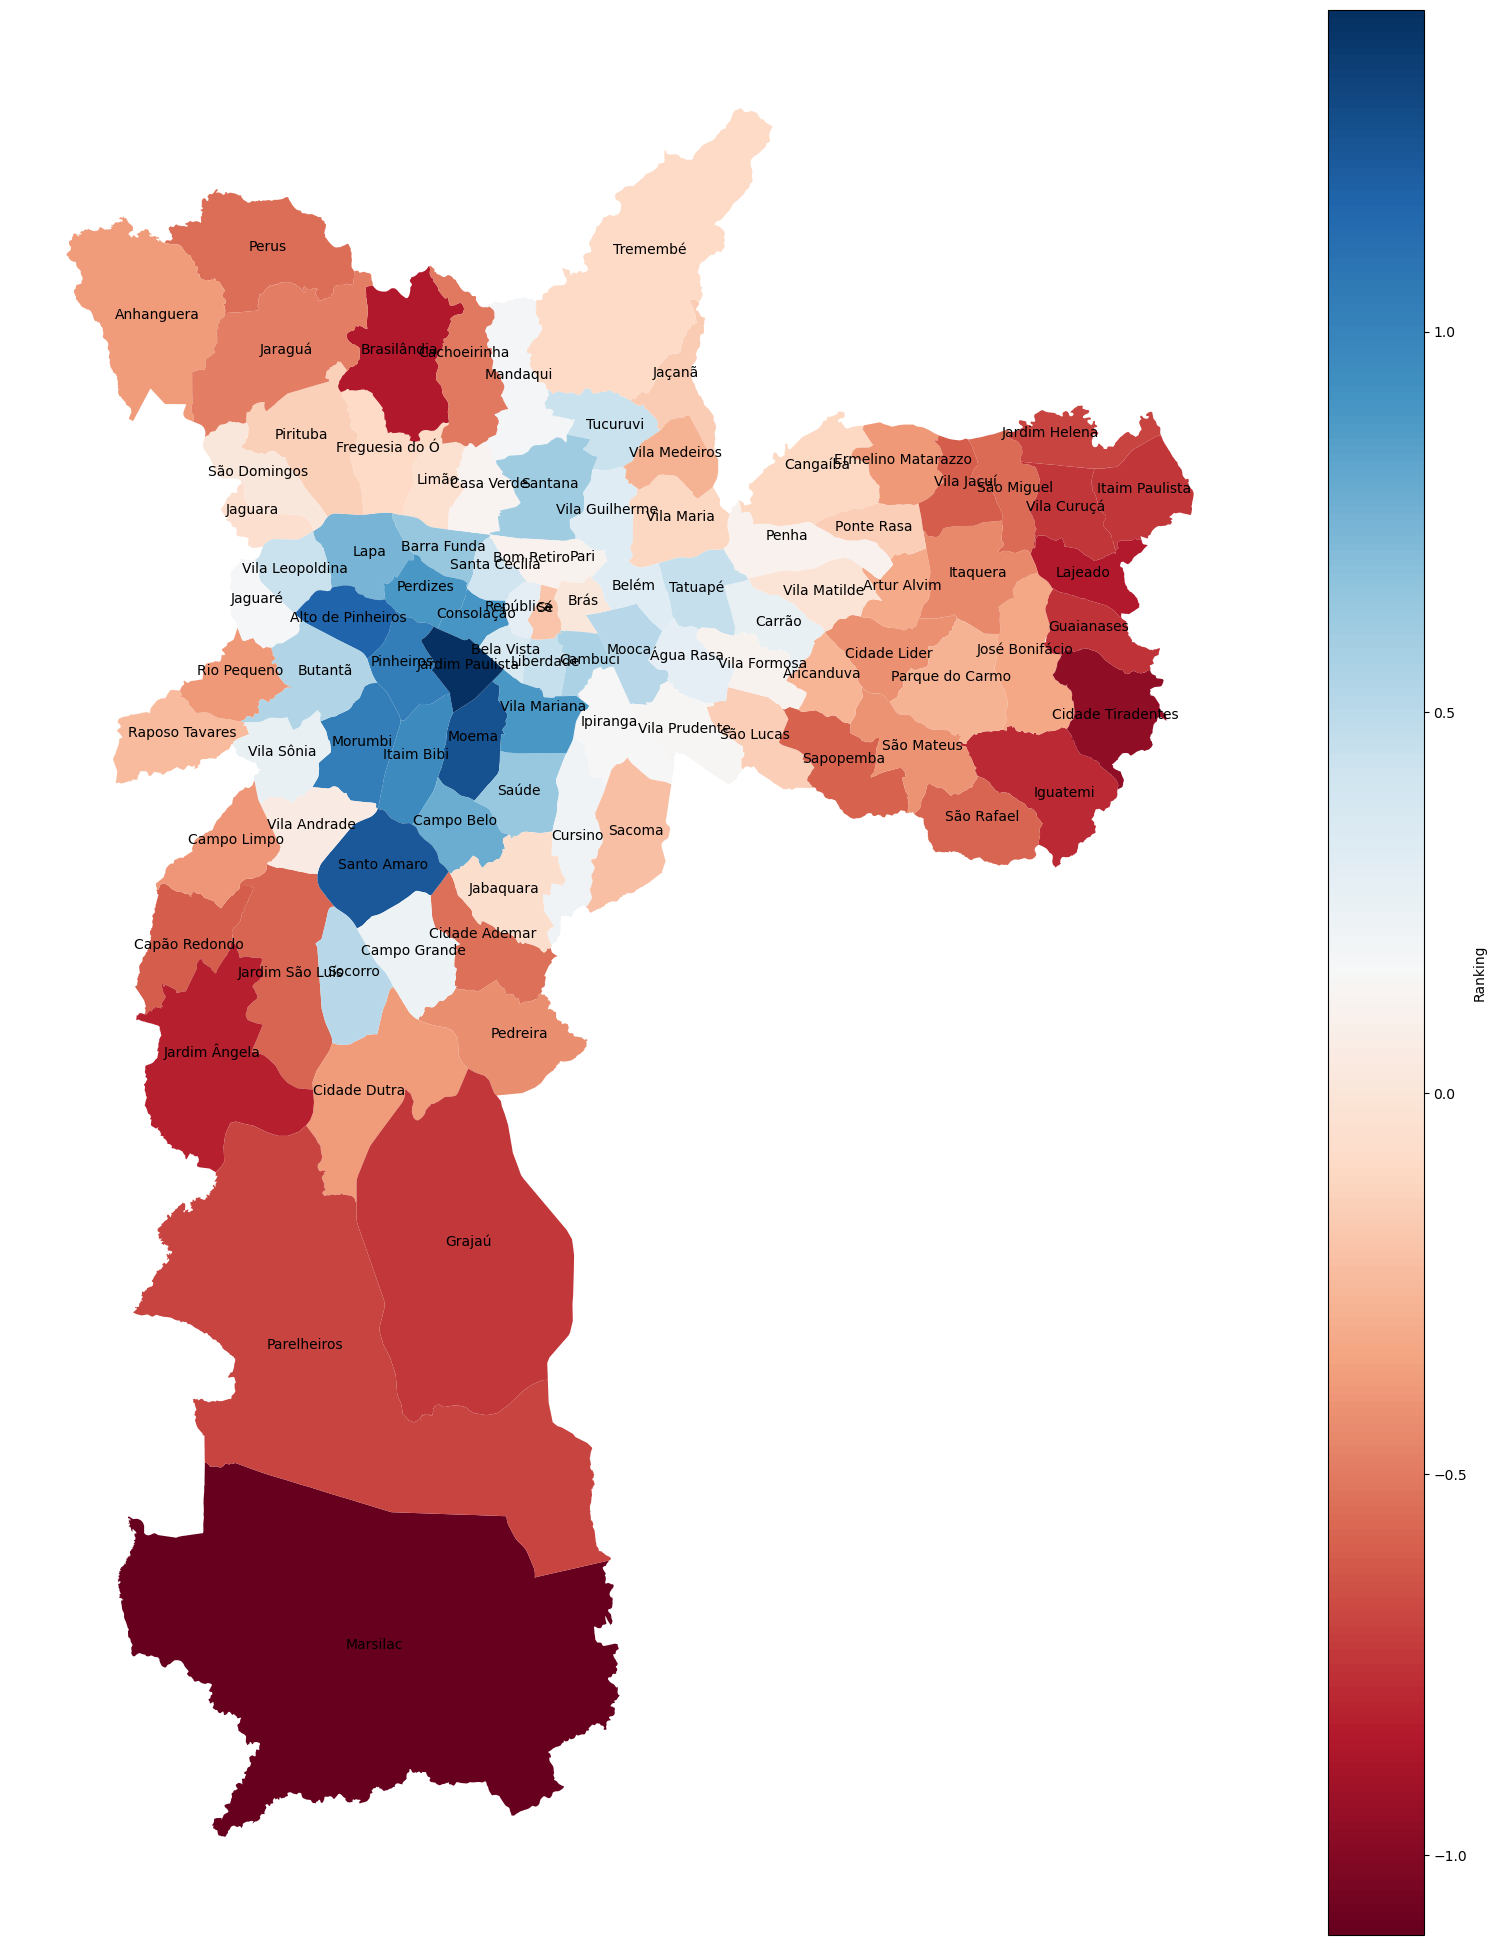

In [137]:
dados_completos.plot(column = 'Rankings', legend = True, 
                     legend_kwds = {'label': 'Ranking', 'orientation':'vertical'},
                     cmap = 'RdBu', figsize = (20,25))
plt.axis('off');
for indice, linha in dados_completos.iterrows():
    plt.annotate(text = linha['distritos'], xy=linha['coords'], horizontalalignment = 'center', color = 'black')

In [133]:
for indice, linha in dados_completos.iterrows():
    print(linha)
    

ds_nome                                                   MANDAQUI
ds_codigo                                                       51
ds_cd_sub                                                       05
ds_subpref                                        SANTANA-TUCURUVI
ds_sigla                                                       MAN
ds_areamt                                              13247863.62
ds_areakm                                                   13.248
geometry         POLYGON ((330950.3728203388 7407837.175963707,...
cod_ibge                                                        47
distritos                                                 Mandaqui
renda                                                         1978
quota                                                    25.200001
escolaridade                                                   7.6
idade                                                           28
mortalidade                                                  1